# CAPT Network

### Kura and Eda

Putting together the locator net and single char classifier

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import tensorflow as tf
from tensorflow.keras import layers, models
import image_preprocess
import os
from CAPT_net import CAPT_NET
from tqdm import tqdm  #Loading bars

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Import

In [2]:
#loc_training data
#Make sure at least one of these files exist
#Path to full data files created by Data Gen Notebook
X_PATH = "data/x_single.npy"
Y_PATH = "data/y_single_pos.npy"

#Preprocessed and saved previously
X_PREPROCESSED = "data/x_single_preprocessed.npy"
Y_PREPROCESSED = "data/y_single_pos_preprocessed.npy"


if not os.path.exists(X_PREPROCESSED):
    print("Preprocessing data, please wait...")
    image_preprocess.preprocess_image_data(X_PATH, Y_PATH)
    print("Preprocessed data saved to disk")

print("Loading in preprocessed data")
print("Creating Splits")
loc_x_train, loc_x_val, loc_x_test, loc_x_train_dev, loc_x_val_dev,  loc_y_train, loc_y_val, loc_y_test, loc_y_train_dev, loc_y_val_dev =  image_preprocess.split(X_PREPROCESSED, Y_PREPROCESSED)


Loading in preprocessed data
Creating Splits


In [3]:
#Make sure at least one of these files exist
#Path to full data files created by Data Gen Notebook
X_PATH = "data/x_single_centered.npy"
Y_PATH = "data/y_single_label_centered.npy"

#Preprocessed and saved previously
X_PREPROCESSED = "data/x_single_centered_preprocessed.npy"
Y_PREPROCESSED = "data/y_single_label_centered_preprocessed.npy"

X_UNCENTERED = "data/x_single.npy"
Y_LOC = "data/y_single_pos.npy"
Y_UNCENTERED = 'data/y_single_label.npy'


if not os.path.exists(X_PATH) or not os.path.exists(Y_PATH):
    #Extracting all centered single char images
    #Creating
    print("Getting all single centered images from dataset")
    y_pos = np.load(Y_LOC)
    y_label = np.load(Y_UNCENTERED)
    x = np.load(X_UNCENTERED)
    centered_labels = y_label[np.nonzero(y_pos)]
    centered_x = x[np.nonzero(y_pos)]

    np.save("data/x_single_centered.npy", centered_x)
    np.save("data/y_single_label_centered.npy", centered_labels)
    print("Cenetered images and labels saved to disk")
    print(f"Centered X samples: {centered_x.shape}")
    #Freeing up memory
    del y_pos
    del y_label
    del centered_labels
    del centered_x


if not os.path.exists(X_PREPROCESSED) and not os.path.exists(Y_PREPROCESSED):
    print("Preprocessing data, please wait...")
    x, y = image_preprocess.preprocess_image_data(X_PATH, Y_PATH)
    print(x.shape)
    print(y.shape)
    print("Preprocessed data saved to disk")
    

print("Loading in preprocessed data")
print("Creating Splits")
class_x_train, class_x_val, class_x_test, class_x_train_dev, class_x_val_dev,  class_y_train, class_y_val, class_y_test, class_y_train_dev, class_y_val_dev =  image_preprocess.split(X_PREPROCESSED, Y_PREPROCESSED, test_split=100)



Loading in preprocessed data
Creating Splits


## Training Networks


In [4]:
#Building Networks
CAPT_net = CAPT_NET(
                K = 5,
                M = 28,
                verbose = True,
                loc_lr = 0.0015,
                class_lr = 0.001)



2023-04-23 18:17:04.876902: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-23 18:17:04.877246: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-23 18:17:04.877270: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MrKrabs): /proc/driver/nvidia/version does not exist
2023-04-23 18:17:04.877853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
188/188 [==============================] - 3s 10ms/step - loss: 0.3519 - accuracy: 0.8371 - val_loss: 0.2227 - val_accuracy: 0.9018
Epoch 2/5
188/188 [==============================] - 2s 9ms/step - loss: 0.1838 - accuracy: 0.9245 - val_loss: 0.1592 - val_accuracy: 0.9310
Epoch 3/5
188/188 [==============================] - 2s 9ms/step - loss: 0.1375 - accuracy: 0.9465 - val_loss: 0.1753 - val_accuracy: 0.9250
Epoch 4/5
188/188 [==============================] - 2s 9ms/step - loss: 0.1253 - accuracy: 0.9504 - val_loss: 0.1075 - val_accuracy: 0.9577
Epoch 5/5
188/188 [==============================] - 2s 9ms/step - loss: 0.1079 - accuracy: 0.9592 - val_loss: 0.1765 - val_accuracy: 0.9315
------------------------
Successfully Trained loc net


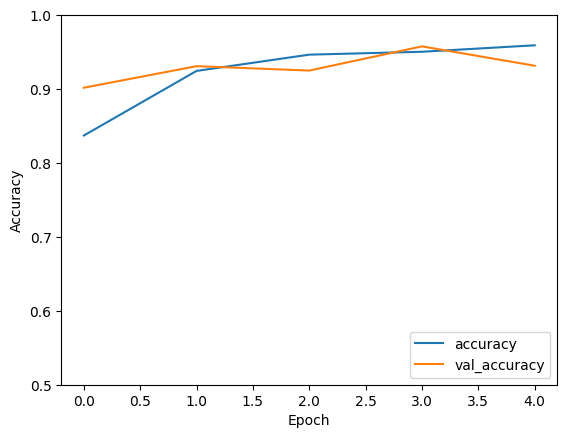

In [5]:
#Training loc net
history = CAPT_net.train_loc(loc_x_train,loc_y_train, loc_x_val, loc_y_val, 
                  loc_mini_batch=100, loc_epochs=5)

print("------------------------")
print("Successfully Trained loc net")

#Plotting Training Data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


Epoch 1/12
94/94 [==============================] - 10s 109ms/step - loss: 3.3533 - accuracy: 0.0847 - val_loss: 2.6301 - val_accuracy: 0.2808
Epoch 2/12
94/94 [==============================] - 10s 107ms/step - loss: 2.0457 - accuracy: 0.4223 - val_loss: 1.7157 - val_accuracy: 0.5013
Epoch 3/12
94/94 [==============================] - 10s 106ms/step - loss: 1.4290 - accuracy: 0.5850 - val_loss: 1.3084 - val_accuracy: 0.6112
Epoch 4/12
94/94 [==============================] - 10s 106ms/step - loss: 1.0861 - accuracy: 0.6776 - val_loss: 1.0636 - val_accuracy: 0.6790
Epoch 5/12
94/94 [==============================] - 10s 107ms/step - loss: 0.8972 - accuracy: 0.7240 - val_loss: 0.8662 - val_accuracy: 0.7321
Epoch 6/12
94/94 [==============================] - 10s 106ms/step - loss: 0.7436 - accuracy: 0.7730 - val_loss: 0.8049 - val_accuracy: 0.7580
Epoch 7/12
94/94 [==============================] - 10s 105ms/step - loss: 0.6457 - accuracy: 0.8013 - val_loss: 0.7155 - val_accuracy: 0.7777

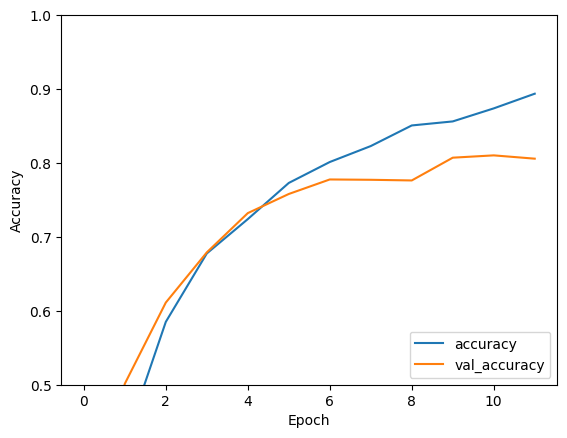

In [6]:
#Training Classifier
history = CAPT_net.train_class(class_x_train,class_y_train, class_x_val, class_y_val, 
                  mini_batch=100, epochs=5)

print("------------------------")
print("Successfully Trained classifer net")

#Plotting Training Data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Multi Char Data

In [7]:
if not os.path.exists("data/x_multi_preprocessed.npy") and not os.path.exists("data/y_multi_preprocessed.npy"):
    print("Preprocessing data...")
    image_preprocess.preprocess_image_data("data/x_multi.npy", "data/y_multi.npy")
    print("Preprocessed data saved to disk")

x_multi = np.load("data/x_multi_preprocessed.npy")
y_multi = np.load("data/y_multi_preprocessed.npy")

print(f"Loaded in images, x.shape = {x_multi.shape}")

Loaded in images, x.shape = (11700, 72, 200, 1)


Predicting Image 6
True Label:      Jttyt
Predicted Label: JLfYJ


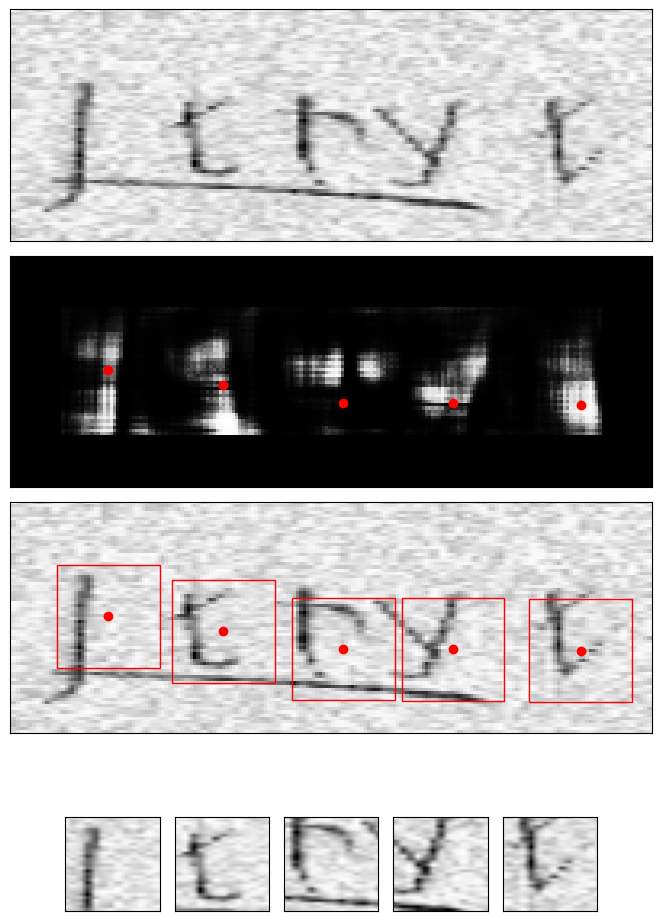

In [124]:
#Test on random image
idx =6 #np.random.randint(x_multi.shape[0])
x = x_multi[idx, :, :, :]
y = y_multi[idx]

print(f"Predicting Image {idx}")

pred, heat_map, centriods = CAPT_net.predict(x)




fig = plt.figure(tight_layout=True)
fig.set_size_inches(10,10)
gs = gridspec.GridSpec(4, 9)

ax = fig.add_subplot(gs[0, :])
ax.imshow(x, cmap="Greys_r")
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(gs[1, :])
ax.imshow(heat_map, cmap="Greys_r")
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(centriods[:,1], centriods[:,0], c='r')

ax = fig.add_subplot(gs[2, :])
ax.imshow(x, cmap="Greys_r")
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(centriods[:,1], centriods[:,0], c='r')
for i, cent in enumerate(centriods):
    rect = patches.Rectangle((cent[1]-16, cent[0]-16), 32,32, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_artist(rect)


for i in range(5):
    ax = fig.add_subplot(gs[3, i+2])
    cent0 = int(centriods[i, 0])
    
    cent1 = int(centriods[i, 1])
    cropped = x[cent0-16:cent0+16 , cent1-16:cent1+16,:]

    ax.imshow(cropped, cmap="Greys_r")
    ax.set_xticks([])
    ax.set_yticks([])
    
    
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

    


print(f"True Label:      {y}")
print(f"Predicted Label: {pred}")

# Accuracy Measurments

Running all the multi char images through net to evaluate accuracy of predictions.

In [80]:
N = 1000

y_multi_pred = np.empty((N,), dtype=str)
cent_pred = np.zeros((N, 5, 2))

correct_predictions = [] #Index of all the predictions

CAPT_net.verbose = False

for i in tqdm (range (N), desc="Calculating Accuracy..."):
    y_multi_pred[i], _, cent_pred[i] = CAPT_net.predict(x_multi[i,:,:,:])
    if y_multi_pred[i] == y_multi[i]:
        correct_predictions.append(i)
    

Calculating Accuracy...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [11:36<00:00,  1.44it/s]


In [81]:
print(len(correct_predictions))

0


In [87]:
num_letters_correct = np.zeros(N)
for i in range(N):
    num_correct = 0
    for j in range(len(y_multi_pred[i])):
        if y_multi_pred[i][j] == y_multi[i][j]:
            num_correct += 1
    num_letters_correct[i]=num_correct
print(num_letters_correct)

[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [88]:
non_pos_sensitive_correct = np.zeros(N)
for i in range(N):
    num_correct = 0
    for j in range(len(y_multi_pred[i])):
        if y_multi_pred[i][j] in y_multi[i]:
            num_correct += 1
    non_pos_sensitive_correct[i]=num_correct

print(non_pos_sensitive_correct)

[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.

In [90]:
non_case_pos_sensitive_correct = np.zeros(N)
for i in range(N):
    num_correct = 0
    for j in range(len(y_multi_pred[i])):
        if y_multi_pred[i][j].lower() in y_multi[i].lower():
            num_correct += 1
    non_case_pos_sensitive_correct[i]=num_correct

print(non_case_pos_sensitive_correct)

[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.

In [98]:
print(np.nonzero(num_letters_correct)[0].shape[0])
print(np.nonzero(non_pos_sensitive_correct)[0].shape[0])
print((np.nonzero(non_case_pos_sensitive_correct)[0].shape[0]))

138
247
322
